<a href="https://colab.research.google.com/github/ZhangYizhe/PythonForDataAnalysis/blob/main/HK_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
chineseCalendar = pd.read_csv('/content/二十四节气.csv')
# chineseCalendar['Date'] = chineseCalendar['Date'].astype('string')

chineseCalendar['month'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[0]
chineseCalendar['day'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[1]
chineseCalendar = chineseCalendar.drop(columns=['Date'])

In [ ]:
def getData(url):
  df = pd.read_csv(url)
  df['年/Year'] = df['年/Year'].astype('string')
  df['月/Month'] = df['月/Month'].astype('string')
  df['日/Day'] = df['日/Day'].astype('string')
  # df['date'] = df['日/Day'] + '/' + df['月/Month'] + '/' + df['年/Year']
  # df['date'] = df['date'].astype('object')
  # df = df.drop(columns=['年/Year', '月/Month', '日/Day', '數據完整性/data Completeness'])
  # df.set_index('date', inplace=True)

  df = df.drop(columns=['數據完整性/data Completeness'])
  df = df.rename(columns={'年/Year':'year', '月/Month':'month', '日/Day':'day', '數值/Value':'temperature'})
  df['temperature'] = df['temperature'].replace('***', np.nan)
  df['temperature'] = df['temperature'].astype('float')
  df.set_index('year', inplace=True)
  return df

In [ ]:
averageTemperatureDF = getData('/content/CLMTEMP_HKO_.csv')['1980':'2020']
lowTemperatureDF = getData('/content/日最低氣溫(攝氏度).csv')['1980':'2020']
highTemperatureDF = getData('/content/日最高氣溫(攝氏度) .csv')['1980':'2020']

In [ ]:
totalDF = averageTemperatureDF
totalDF = totalDF.rename(columns={'temperature' : 'average'})
totalDF['low'] = lowTemperatureDF['temperature']
totalDF['high'] = highTemperatureDF['temperature']

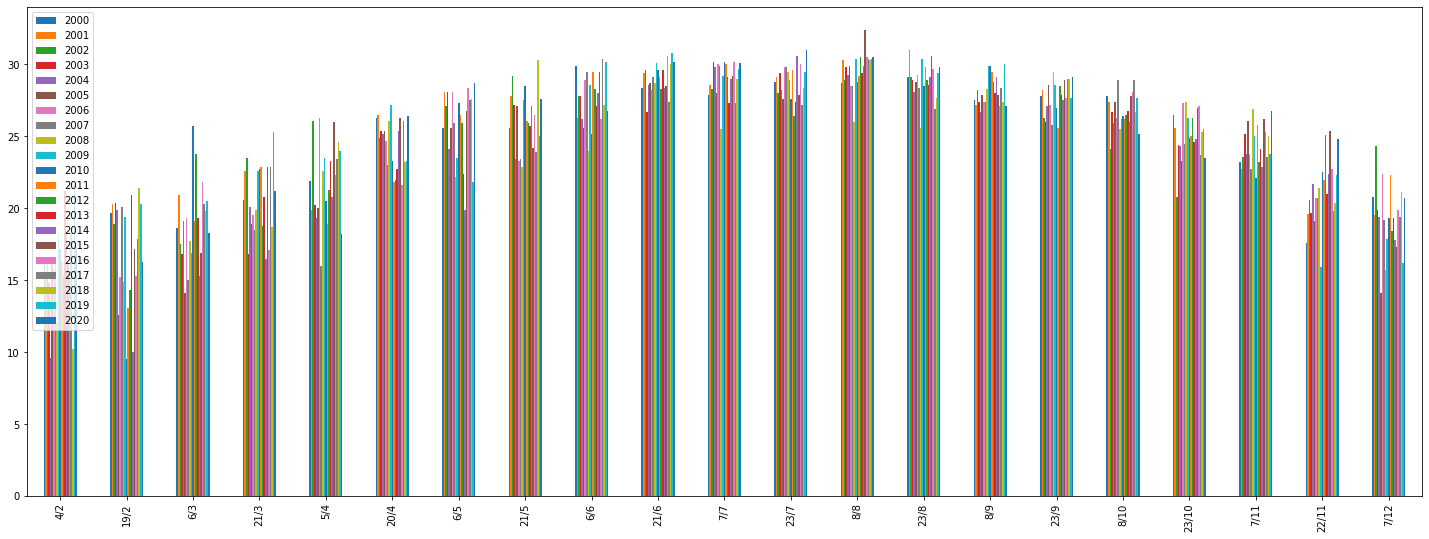

In [311]:
def dataProcess(df):
  frame = pd.DataFrame()
  for ccrow in chineseCalendar.iterrows():
    month = ccrow[1]['month']
    day = ccrow[1]['day']

    row = df.loc[(df['month'] == month) & (df['day'] == day)].copy()
    row.reset_index(drop=True, inplace=True)
    row['date'] = row['day'] + '/' + row['month']
    row = row.drop(columns=['day', 'month', 'low', 'high'])
    frame = frame.append(row)
  frame.set_index('date', inplace=True)

  return frame

datas = {}
yearRange = range(2000, 2021)
for i in yearRange:
  year = '{year}'.format(year=i)
  processData = dataProcess(totalDF[year:year])
  for item in processData.iterrows():
    date = item[0]
    if date not in datas:
      datas[date] = []
    datas[date].append(item[1]['average'])

datas = pd.DataFrame(datas).T

tempIndex = 0
years = {}
for i in yearRange:
  years[tempIndex] = i
  tempIndex += 1


datas = datas.rename(columns=years)
# datas

datas.plot.bar(figsize=(25,9))

In [ ]:
for i in range(1980, 2021):
  year = '{year}'.format(year=i)
  print(totalDF[year:year][0])

     month day  average   low  high
year                               
1980     1   1     18.8  17.4  21.7
1980     1   2     19.2  17.5  22.4
1980     1   3     19.4  17.3  23.3
1980     1   4     18.1  14.4  21.1
1980     1   5     15.1  12.7  16.9
...    ...  ..      ...   ...   ...
1980    12  27     16.4  14.9  18.6
1980    12  28     14.8  12.4  17.3
1980    12  29     15.9  13.9  18.6
1980    12  30     16.0  13.8  18.2
1980    12  31     16.5  15.0  18.4

[366 rows x 5 columns]
     month day  average   low  high
year                               
1981     1   1     17.6  14.8  21.3
1981     1   2     17.1  14.9  20.1
1981     1   3     15.1  13.0  17.4
1981     1   4     15.2  13.8  16.9
1981     1   5     16.2  14.0  18.1
...    ...  ..      ...   ...   ...
1981    12  27     19.3  16.0  23.0
1981    12  28     19.8  18.8  21.1
1981    12  29     19.4  16.9  21.2
1981    12  30     17.1  16.0  18.2
1981    12  31     16.9  14.8  19.5

[365 rows x 5 columns]
     month day  